# High Frequency Trading HW3

## cw2945   Chenyu Wang

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('MMSecondPricesOrders_Fall2019.xlsx')
order = pd.read_excel('Order.xlsx')

In [3]:
data = data.iloc[:, :3]

In [4]:
data.head()

,Time,Bid,Ask
0,2018-01-07 22:02:04,1.35554,1.35618
1,2018-01-07 22:02:05,1.35554,1.35619
2,2018-01-07 22:02:06,1.35554,1.35619
3,2018-01-07 22:02:07,1.35546,1.35619
4,2018-01-07 22:02:08,1.35546,1.35619


In [5]:
order.head()

,Side,Time,Then B,Then O
0,B,2018-01-07 22:04:12,1.35558,1.35615
1,S,2018-01-07 22:04:13,1.35558,1.35615
2,B,2018-01-07 22:04:14,1.35558,1.35615
3,S,2018-01-07 22:04:15,1.35558,1.35615
4,B,2018-01-07 22:04:16,1.35558,1.35615


### Method 1

In [6]:
### Method 1 FUll execute
PnL_1 = []
for i in range(order.shape[0]):
    if order.iloc[i, 0] == 'B':
        PnL_1.append((order.iloc[i, 2] - order.iloc[i, 3])/2)
    else :
        PnL_1.append((order.iloc[i, 3] - order.iloc[i, 2])/2)

### Method 2

In [7]:
### Method 2 Mid execute
def Mid_Method(time, stop_loss):
    
    PnL_2 = []
    exe_time = []
    method = []
    for i in range(order.shape[0]):
        Mid_price = (order.iloc[i, 2] + order.iloc[i, 3])/2
        data_new = data[data['Time'] > order.iloc[i, 1]]
        data_new = data_new.reset_index()
        if order.iloc[i, 0] == 'B':
            stop_loss_line = order.iloc[i, 3] + stop_loss
            j = 0
            while Mid_price < data_new.iloc[j, 3] and data_new.iloc[j, 3] < stop_loss_line and j < time - 1:
                j = j + 1
            execute_price = data_new.iloc[j, 3]
            PnL_2.append(Mid_price - execute_price)
            exe_time.append(j + 1)
            if execute_price >= stop_loss_line :
                method.append('SL')
            elif j == time - 1:
                method.append('TTE')
            else:
                method.append('Normal')
                
        else :
            stop_loss_line = order.iloc[i, 2] - stop_loss
            j = 0
            while Mid_price > data_new.iloc[j, 2] and data_new.iloc[j, 2] > stop_loss_line and j < time - 1:
                j = j + 1
            execute_price = data_new.iloc[j, 2]
            PnL_2.append(execute_price - Mid_price)
            exe_time.append(j + 1)
            if execute_price <= stop_loss_line :
                method.append('SL')
            elif j == time - 1:
                method.append('TTE')
            else :
                method.append('Normal')
    
    result = pd.DataFrame({'PnL':PnL_2, 'Execution Time':exe_time, 'method':method})
    return result

### Method 3

In [8]:
### Method 3 Mid execute
def Side_Method(time, stop_loss):
    
    PnL_3 = []
    exe_time = []
    method = []
    for i in range(order.shape[0]):
        Mid_price = (order.iloc[i, 2] + order.iloc[i, 3])/2
        data_new = data[data['Time'] > order.iloc[i, 1]]
        data_new = data_new.reset_index()
        if order.iloc[i, 0] == 'B':
            side_price = order.iloc[i, 2]
            stop_loss_line = order.iloc[i, 3] + stop_loss
            j = 0
            while side_price < data_new.iloc[j, 3] and data_new.iloc[j, 3] < stop_loss_line and j < time - 1:
                j = j + 1
            execute_price = data_new.iloc[j, 3]
            PnL_3.append(Mid_price - execute_price)
            exe_time.append(j + 1)
            if execute_price >= stop_loss_line :
                method.append('SL')
            elif j == time - 1:
                method.append('TTE')
            else:
                method.append('Normal')
                
        else :
            side_price = order.iloc[i, 3]
            stop_loss_line = order.iloc[i, 2] - stop_loss
            j = 0
            while side_price > data_new.iloc[j, 2] and data_new.iloc[j, 2] > stop_loss_line and j < time - 1:
                j = j + 1
            execute_price = data_new.iloc[j, 2]
            PnL_3.append(execute_price - Mid_price)
            exe_time.append(j + 1)
            if execute_price <= stop_loss_line :
                method.append('SL')
            elif j == time - 1:
                method.append('TTE')
            else :
                method.append('Normal')
    
    result = pd.DataFrame({'PnL':PnL_3, 'Execution Time':exe_time, 'method':method})
    return result

### Combine the results of three methods and show them on one table

In [9]:
report = pd.concat([order, pd.DataFrame(PnL_1, columns = ['Method 1']), Mid_Method(20, 0.0003), Side_Method(20, 0.0003) ], axis = 1)

In [10]:
report

,Side,Time,Then B,Then O,Method 1,PnL,Execution Time,method,PnL,Execution Time,method
0,B,2018-01-07 22:04:12,1.35558,1.35615,-0.000285,-2.850000e-04,20,TTE,-0.000285,20,TTE
1,S,2018-01-07 22:04:13,1.35558,1.35615,0.000285,-2.850000e-04,20,TTE,-0.000285,20,TTE
2,B,2018-01-07 22:04:14,1.35558,1.35615,-0.000285,-2.850000e-04,20,TTE,-0.000285,20,TTE
3,S,2018-01-07 22:04:15,1.35558,1.35615,0.000285,-2.850000e-04,20,TTE,-0.000285,20,TTE
4,B,2018-01-07 22:04:16,1.35558,1.35615,-0.000285,-2.850000e-04,20,TTE,-0.000285,20,TTE
5,B,2018-01-07 22:04:17,1.35558,1.35615,-0.000285,-2.850000e-04,20,TTE,-0.000285,20,TTE
6,B,2018-01-07 22:04:18,1.35558,1.35615,-0.000285,-2.850000e-04,20,TTE,-0.000285,20,TTE
7,S,2018-01-07 22:04:19,1.35558,1.35615,0.000285,-2.450000e-04,20,TTE,-0.000245,20,TTE
8,S,2018-01-07 22:04:20,1.35558,1.35615,0.000285,-2.450000e-04,20,TTE,-0.000245,20,TTE
9,S,2018-01-07 22:04:21,1.35558,1.35615,0.000285,-3.850000e-04,20,TTE,-0.000385,20,TTE


### Report the stats that we are concerned

In [11]:
def report_stats(df, method):
    result = {}
    result['Minimum PnL'] = [float(df['PnL'].min())]
    result['Average PnL'] = [float(df['PnL'].mean())]
    result['Median PnL'] = [float(df['PnL'].median())]
    result['PnL Volatility'] = [float(df['PnL'].std())]
    result['Average Time'] = [float(df['Execution Time'].mean())]
    result['Median Time'] = [float(df['Execution Time'].mean())]
    result['Stop Loss Triggered Times'] = [df[df['method'] == 'SL'].shape[0]]
    result['Time Limit Triggered Times'] = [df[df['method'] == 'TTE'].shape[0]]
    
    
    result = pd.DataFrame(result, index = [method])
    return result

In [12]:
report_stats(report.iloc[:, 5:8], 'Mid Method')

,Minimum PnL,Average PnL,Median PnL,PnL Volatility,Average Time,Median Time,Stop Loss Triggered Times,Time Limit Triggered Times
Mid Method,-0.001195,-0.000116,-0.000237,0.000453,10.333333,10.333333,23,32


In [13]:
report_stats(report.iloc[:, 8:], 'Side Method')

,Minimum PnL,Average PnL,Median PnL,PnL Volatility,Average Time,Median Time,Stop Loss Triggered Times,Time Limit Triggered Times
Side Method,-0.001195,-0.000117,-0.000242,0.000454,10.977778,10.977778,23,34


From the result above, we can find that there are not too much difference between method 2 and method 3. But obviously, we can find that it's more difficult for method 3 to trade in a normal way. The average time is higher and there are more times that it hits the stop loss line. It seems that method 3 should have a higher PnL but since it triggered stop loss more times, the average PnL is lower.

Here, we also consider volatility of the PnL, we dind that the volatility of the two methods are almost the same.

In [14]:
def report_TTE_sensitivity(func, lower, upper, method):
    median_list = []
    for time in np.arange(lower, upper, 1):
        rep = func(time, 0.0005)
        median_list.append(float(rep['PnL'].median()))
    fig, ax = plt.subplots()
    ax.plot(np.arange(lower, upper, 1), median_list, marker = "o", color = 'red')
    ax.set_xlabel("TTE")
    ax.set_ylabel("Median PnL")
    ax.set_title("How does median PnL Move when TTE changes " + method)
    plt.show()
        

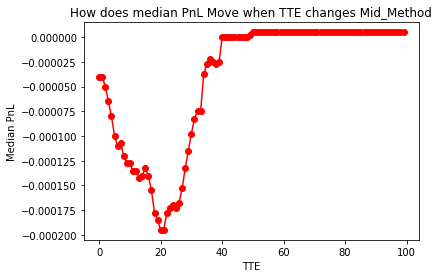

In [15]:
report_TTE_sensitivity(Mid_Method, 0, 100, 'Mid_Method')

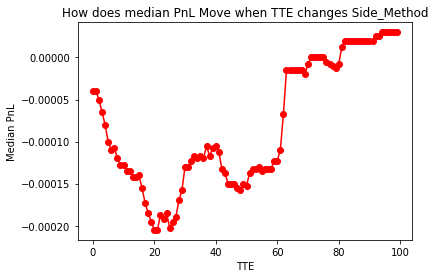

In [16]:
report_TTE_sensitivity(Side_Method, 0, 100, 'Side_Method')

From the graph above, we can conclude that when we extend the TTE, the median PnL will eventually higher. This make sense because when we have a long TTE, market has more opportunity to hit the Midprice / Sideprice so that it could be traded in a normal way. It's not a monotone increasing because we need also take stop loss into consideration.

In [17]:
def report_SL_sensitivity(func, lower, upper, method):
    median_list = []
    for sl in np.arange(lower, upper, 0.00001):
        rep = func(100, sl)
        median_list.append(float(rep['PnL'].median()))
    fig, ax = plt.subplots()
    ax.plot(np.arange(lower, upper, 0.00001), median_list, marker = "o", color = 'red')
    ax.set_xlabel("SL")
    ax.set_ylabel("Median PnL")
    ax.set_title("How does median PnL Move when SL changes " + method)
    plt.show()

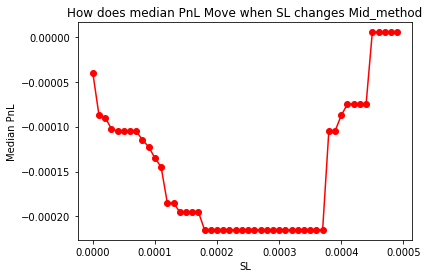

In [18]:
report_SL_sensitivity(Mid_Method, 0, 0.0005, 'Mid_method')

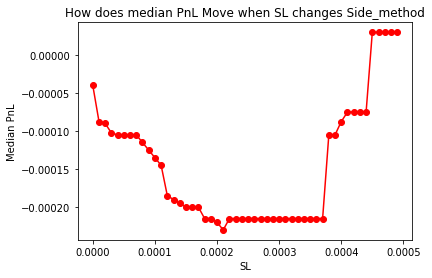

In [19]:
report_SL_sensitivity(Side_Method, 0, 0.0005, 'Side_method')

From the above graph above, we can conclude that the median PnL will eventually increase if we enlarge the stop loss range. It also easily makes sense because it will have lower possibility to hit the stop loss line so the PnL won't be so low. Also, it's not a monotone increasing because we need to take TTE into consideration.